In [1]:
print("DDPM")

DDPM


In [2]:
'''
mean = sqrt(a_hat_t) * x_0
variance = sqrt(1 - a_hat_t) * random_noise
'''

'\nmean = sqrt(a_hat_t) * x_0\nvariance = sqrt(1 - a_hat_t) * random_noise\n'

In [3]:
import torch

In [4]:
batch_size = 2
x0 = torch.randn(batch_size, 3, 32, 32)

In [5]:
betas = torch.tensor([0.05, 0.1, 0.15, 0.2, 0.25])

In [6]:
# time step 
t = torch.tensor([1, 3])

In [7]:
# betas -> amounts of noise that are being applied at every timestep of the diffusion process
# alpha -> 1 - betas -> amount of original image's information that is being  preserve3d after a diffusion process step


In [8]:
alphas = 1 - betas

In [9]:
alphas

tensor([0.9500, 0.9000, 0.8500, 0.8000, 0.7500])

In [10]:
# a_hat_t = multi from i = 1 to t for a_i
alpha_hat = torch.cumprod(alphas, axis = 0)

In [11]:
alpha_hat

tensor([0.9500, 0.8550, 0.7268, 0.5814, 0.4360])

In [12]:
alpha_hat.size()

torch.Size([5])

In [13]:
x0.size()

torch.Size([2, 3, 32, 32])

In [14]:
# alpha_hat actually impact by the timestep, from i = 1 to t [timestep]
# alpha_hat here is all alpha_hat possibilities
# so the result is impact by the timestep of all alpha_hat
# the result = a_hat_t
result = alpha_hat.gather(-1, t)  # t is like the index
result # get the first value and the third value

tensor([0.8550, 0.5814])

In [15]:
result.size()

torch.Size([2])

In [16]:
# the x0 size is [bs, 3, 32, 32] and the result[alpha_hat impact by timestep] size is [2]
# need let these two variables size become the same to do after multiply calculation
result = result.reshape(-1, 1, 1, 1)
result.size()

torch.Size([2, 1, 1, 1])

In [17]:
a_hat_t = result

noise = torch.rand_like(x0)

'''
mean = sqrt(a_hat_t) * x_0
variance = sqrt(1 - a_hat_t) * random_noise
'''
mean = a_hat_t.sqrt() * x0
variance = torch.sqrt(1 - a_hat_t) * noise

In [18]:
xt = mean + variance

In [19]:
xt.size()

torch.Size([2, 3, 32, 32])

In [20]:
# first xt image
xt[0]

tensor([[[ 1.2952,  1.6421, -0.5898,  ...,  0.6638, -0.1909, -0.3939],
         [ 0.9790,  2.0637,  0.8263,  ...,  0.2327, -0.3578,  0.5165],
         [ 0.7212,  0.5729, -0.0038,  ..., -0.4716,  1.4360, -0.9139],
         ...,
         [-0.8836,  1.4542, -1.2123,  ..., -0.8661,  0.7104,  0.3458],
         [ 0.1805,  1.2179,  2.4392,  ...,  1.5210,  0.7428, -0.5110],
         [-0.2911,  1.8179,  0.9969,  ...,  0.0631, -0.4951,  0.4541]],

        [[ 0.1319,  0.5579, -0.6892,  ...,  1.0143,  1.3717, -0.0734],
         [ 2.7568,  0.1393,  0.7438,  ...,  1.4419, -0.0405,  1.0515],
         [-1.5275,  0.3240,  0.1381,  ..., -0.6330, -1.5157, -0.8172],
         ...,
         [ 1.3330,  1.6791, -0.4755,  ...,  0.0177, -1.1271, -0.4750],
         [ 0.4962,  0.2878, -1.4608,  ...,  1.5932,  0.6928, -0.7593],
         [-0.2541, -0.3843,  0.2673,  ..., -0.7946, -0.9885, -0.7108]],

        [[ 0.2543, -0.9927, -1.5987,  ...,  0.6163,  1.2316,  1.2689],
         [ 0.2366,  0.2737, -0.9145,  ...,  0

In [21]:
# second xt image
xt[1]

tensor([[[ 0.5406,  1.0255, -0.4909,  ...,  0.1771,  0.4894, -0.0539],
         [ 1.0727, -0.9100,  0.8350,  ...,  0.0090, -0.5103,  0.0752],
         [ 0.5659,  0.9135,  0.0595,  ...,  0.3491, -0.0599,  1.4316],
         ...,
         [-0.2972,  0.1875,  0.0112,  ..., -0.3307, -0.2528, -0.8687],
         [ 0.2593, -0.1910, -0.1245,  ..., -0.5764,  0.4969,  0.5763],
         [ 0.0991,  1.3757, -0.3558,  ..., -0.4858,  1.2655,  0.5867]],

        [[ 2.0367,  1.2633, -0.6815,  ...,  1.1550,  0.2676, -0.0338],
         [ 0.5318, -0.3815, -0.5457,  ...,  0.5146,  0.1233,  0.3509],
         [ 1.2235,  1.3815,  0.2538,  ..., -0.2517,  0.2019, -0.1152],
         ...,
         [ 0.3506,  0.2454,  0.4474,  ...,  0.3145,  0.9610, -0.3113],
         [ 1.7812,  1.2563,  0.8710,  ...,  0.7653,  0.6056, -0.3178],
         [-1.1371,  0.0730,  0.1098,  ...,  0.5372,  1.4221,  0.3140]],

        [[ 0.5440,  0.2318, -0.7421,  ...,  0.3631, -0.7064, -0.6054],
         [ 0.6572,  0.2867,  0.5375,  ..., -1

In [22]:
# forward diffusion function: Adding noise
def forward_diffusion(x0, t, betas=torch.linspace(0.0, 1.0, 5)):
    noise = torch.rand_like(x0) # random tensor with values sampled from N(0, 1) [standard Gaussian Distribution]
    alphas = 1 - betas
    alpha_hat = torch.cumprod(alphas, axis = 0)
    alpha_hat_t = alpha_hat.gather(-1, t).reshape(-1, 1, 1, 1)
    
    mean = alpha_hat_t.sqrt() * x0
    variance = torch.sqrt(1 - alpha_hat_t) * noise
    
    return mean + variance, noise


In [23]:
from PIL import Image

In [24]:
filename = "racoon.jpg"

image = Image.open(filename)

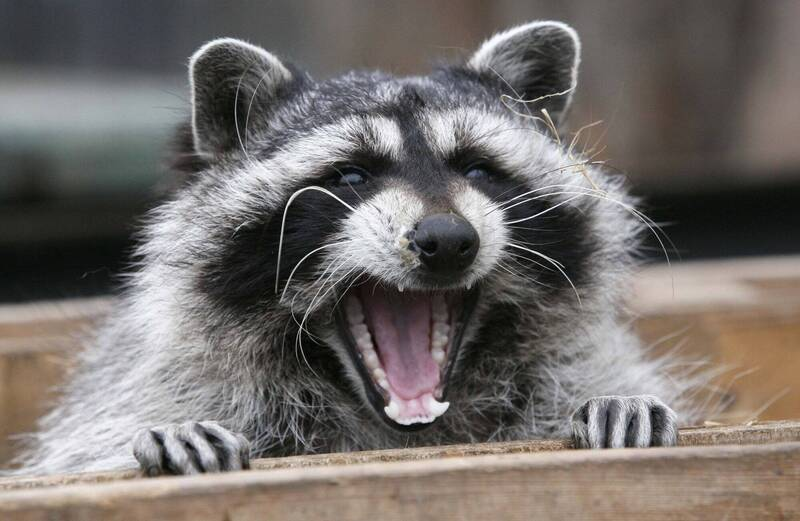

In [25]:
image

In [26]:
from torchvision import transforms
import numpy as np

transform = transforms.Compose([
    # PIL -> troch
    transforms.Resize((32, 32)),
    transforms.ToTensor(), # scale from 0 to 1
    # scale from -1 to 1 to fit the Normal Gaussian Distrabution
    transforms.Lambda(lambda t: (t*2) - 1) # 0 -> -1 & 1 -> 1 
])

reverse_transform = transforms.Compose([
    # torch to PIL
    transforms.Lambda(lambda t: (t + 1) / 2),
    # in torch the image shape is like [bs, channel, H, W]
    # in PIL the image shape is like [H, W, C]
    # this code is change the channle value pos.
    transforms.Lambda(lambda t: t.permute(1, 2, 0)),
    transforms.Lambda(lambda t: t * 255.),
    transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
    transforms.ToPILImage(),
])

In [27]:
torch_image = transform(image)

In [28]:
torch_image

tensor([[[-0.5608, -0.5608, -0.5216,  ..., -0.4588, -0.3569, -0.1451],
         [-0.5608, -0.5608, -0.5294,  ..., -0.4510, -0.3412, -0.1294],
         [-0.5608, -0.5608, -0.5216,  ..., -0.4275, -0.3176, -0.1059],
         ...,
         [ 0.5216,  0.6000,  0.6314,  ...,  0.2078,  0.1451,  0.1294],
         [ 0.5137,  0.5137,  0.5216,  ...,  0.1216,  0.0980,  0.1373],
         [ 0.1529,  0.0980,  0.0196,  ...,  0.1373,  0.0745,  0.0745]],

        [[-0.5373, -0.5373, -0.4980,  ..., -0.4980, -0.4118, -0.2157],
         [-0.5451, -0.5451, -0.5059,  ..., -0.4980, -0.4039, -0.2000],
         [-0.5451, -0.5373, -0.4980,  ..., -0.4667, -0.3647, -0.1765],
         ...,
         [ 0.4510,  0.5294,  0.5373,  ...,  0.0431, -0.0431, -0.0745],
         [ 0.4118,  0.4039,  0.4118,  ..., -0.0431, -0.0902, -0.0667],
         [-0.0196, -0.0588, -0.1216,  ..., -0.0745, -0.1373, -0.1373]],

        [[-0.4902, -0.4902, -0.4431,  ..., -0.5216, -0.4353, -0.2314],
         [-0.5059, -0.5059, -0.4667,  ..., -0

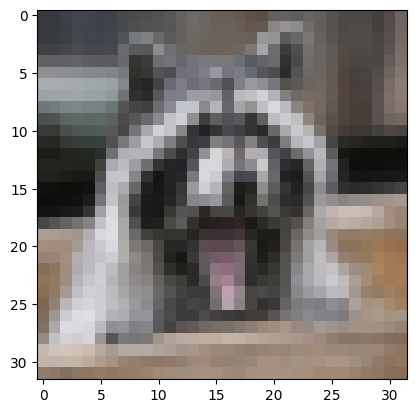

In [29]:
import matplotlib.pyplot as plt

plt.imshow(reverse_transform(torch_image))

In [30]:
t = torch.tensor([0, 1, 2, 3, 4])
batch_images = torch.stack([torch_image] * 5)

print(batch_images.size())
print(t.size())

torch.Size([5, 3, 32, 32])
torch.Size([5])


In [31]:
noisy_images, _ = forward_diffusion(batch_images, t)


In [32]:
noisy_images

tensor([[[[-5.6078e-01, -5.6078e-01, -5.2157e-01,  ..., -4.5882e-01,
           -3.5686e-01, -1.4510e-01],
          [-5.6078e-01, -5.6078e-01, -5.2941e-01,  ..., -4.5098e-01,
           -3.4118e-01, -1.2941e-01],
          [-5.6078e-01, -5.6078e-01, -5.2157e-01,  ..., -4.2745e-01,
           -3.1765e-01, -1.0588e-01],
          ...,
          [ 5.2157e-01,  6.0000e-01,  6.3137e-01,  ...,  2.0784e-01,
            1.4510e-01,  1.2941e-01],
          [ 5.1373e-01,  5.1373e-01,  5.2157e-01,  ...,  1.2157e-01,
            9.8039e-02,  1.3725e-01],
          [ 1.5294e-01,  9.8039e-02,  1.9608e-02,  ...,  1.3725e-01,
            7.4510e-02,  7.4510e-02]],

         [[-5.3725e-01, -5.3725e-01, -4.9804e-01,  ..., -4.9804e-01,
           -4.1176e-01, -2.1569e-01],
          [-5.4510e-01, -5.4510e-01, -5.0588e-01,  ..., -4.9804e-01,
           -4.0392e-01, -2.0000e-01],
          [-5.4510e-01, -5.3725e-01, -4.9804e-01,  ..., -4.6667e-01,
           -3.6471e-01, -1.7647e-01],
          ...,
     

torch.Size([3, 32, 32])


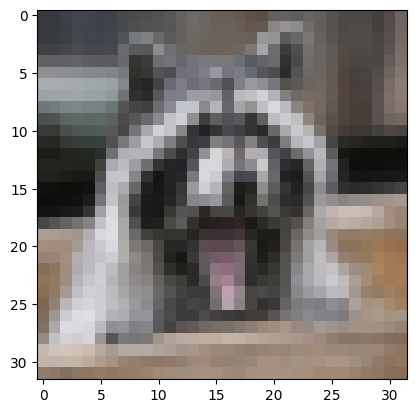

torch.Size([3, 32, 32])


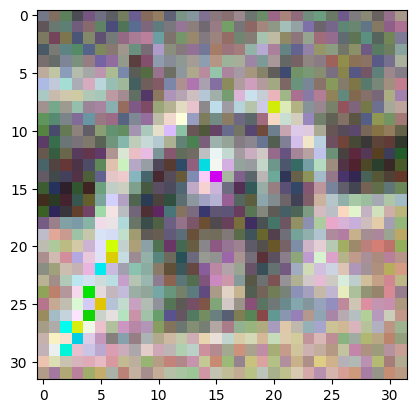

torch.Size([3, 32, 32])


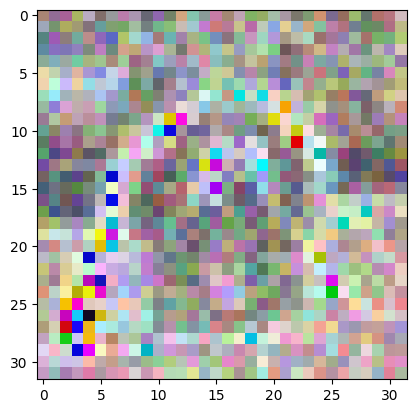

torch.Size([3, 32, 32])


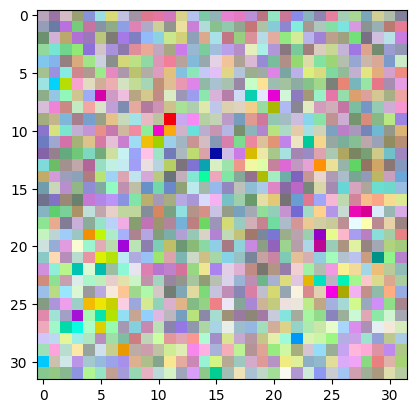

torch.Size([3, 32, 32])


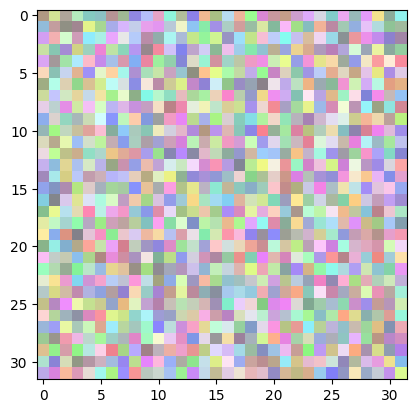

In [33]:
# data for diffusion to train {noisy_image, noise}
for noisy_image in noisy_images:
    print(noisy_image.size())
    plt.imshow(reverse_transform(noisy_image))
    plt.show()